In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

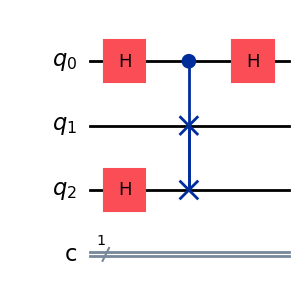

In [2]:
qc = QuantumCircuit(3, 1)


qc.h(2)  # Put in superposition state
# Fidelity measurement
qc.h(0)
qc.cswap(0, 1, 2)
qc.h(0)
qc.draw('mpl')


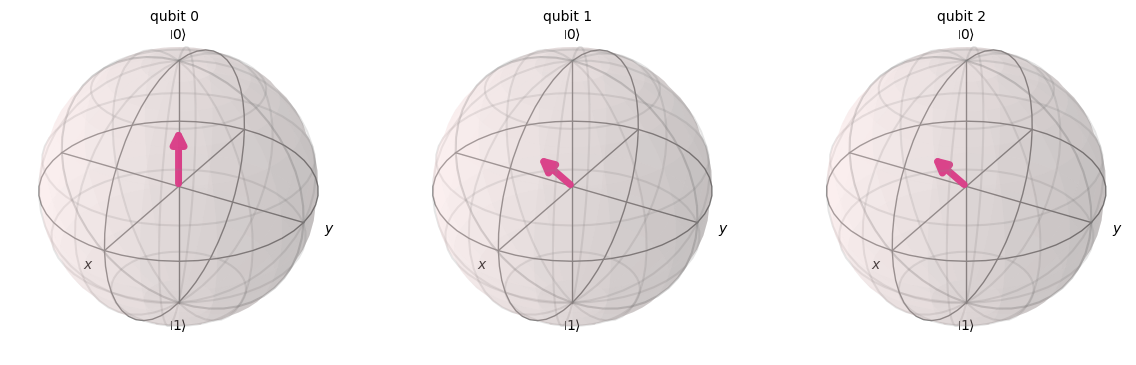

In [3]:
# Statevector Visualisation
state = Statevector.from_int(0, 2**3)
state = state.evolve(qc)
display(plot_bloch_multivector(state))

In [7]:
# Measure and Run
qc.measure(0, 0)
sim = AerSimulator()
job = sim.run(qc)
results = job.result()
counts = results.get_counts()
if '0' and '1' in counts.keys():
    fidelity = counts['0']/1000 - counts['1']/1000
    print(f'Fidelity: {fidelity}')
else:
    print(f'Fidelity: 1')

Fidelity: 0.498
